In [1]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

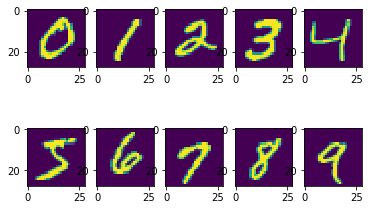

In [2]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax = plt.subplots(2,5)
ax=ax.flatten()
for i in range(10):
    Im=X_train[Y_train==i][0]
    ax[i].imshow(Im)
plt.show()

In [3]:
from keras.utils import to_categorical 
YY0=to_categorical(Y_train)
YY1=to_categorical(Y_test)
YY1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
from keras.layers import Activation, Dense, Flatten, Input
from keras import Model

input_shape=(28,28)
input_layer=Input(input_shape)
x=input_layer
x=Flatten()(x)
x=Dense(10)(x)
x=Activation('softmax')(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [6]:
model.fit(X_train,YY0,validation_data=(X_test,YY1),batch_size=1000,epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 10us/step - loss: 41.0436 - accuracy: 0.5807 - val_loss: 11.9884 - val_accuracy: 0.8037
Epoch 2/10
60000/60000 [==============================] - 0s 3us/step - loss: 9.9920 - accuracy: 0.8215 - val_loss: 7.9286 - val_accuracy: 0.8458
Epoch 3/10
60000/60000 [==============================] - 0s 3us/step - loss: 7.1624 - accuracy: 0.8519 - val_loss: 6.4392 - val_accuracy: 0.8590
Epoch 4/10
60000/60000 [==============================] - 0s 3us/step - loss: 5.7960 - accuracy: 0.8660 - val_loss: 5.3792 - val_accuracy: 0.8733
Epoch 5/10
60000/60000 [==============================] - 0s 3us/step - loss: 4.9534 - accuracy: 0.8742 - val_loss: 4.9471 - val_accuracy: 0.8698
Epoch 6/10
60000/60000 [==============================] - 0s 3us/step - loss: 4.3439 - accuracy: 0.8796 - val_loss: 4.5031 - val_accuracy: 0.8782
Epoch 7/10
60000/60000 [==============================] - 0s 3us/step -

In [7]:
model.layers

In [8]:
model.layers[2].get_weights()

[array([[-0.05565652,  0.015215  ,  0.06858993, ...,  0.03566454,
         -0.04445492, -0.04594442],
        [ 0.08481307, -0.00585061,  0.03884106, ..., -0.04577161,
          0.05010545,  0.08013982],
        [-0.05170168,  0.07752348,  0.05206   , ..., -0.05875308,
         -0.04749371,  0.01436879],
        ...,
        [-0.0730074 ,  0.03393412,  0.06031621, ..., -0.08238299,
          0.00510264, -0.01737064],
        [-0.01897098,  0.05679537,  0.06427421, ...,  0.01794989,
         -0.02879616, -0.06401829],
        [-0.07803888, -0.0684201 , -0.00473873, ..., -0.02873569,
         -0.04368019,  0.02911426]], dtype=float32),
 array([-0.03793368,  0.04927378,  0.00793594, -0.05724185,  0.004284  ,
         0.16685256, -0.02291391,  0.06838582, -0.07415254, -0.021823  ],
       dtype=float32)]

In [9]:
model.layers[2].get_weights()[0].shape

(784, 10)

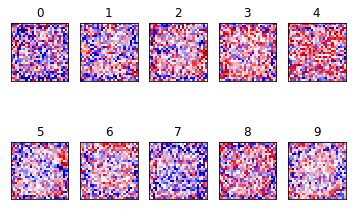

In [13]:
fig,ax = plt.subplots(2,5)
ax=ax.flatten()
weights = model.layers[2].get_weights()[0]
for i in range(10):
    Im=weights[:,i].reshape((28,28))
    ax[i].imshow(Im,cmap='seismic')
    ax[i].set_title("{}".format(i))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()